### Details of dataset:

* Sex  - male, female
* Age - round up to 5 year
* Height - round up to 5 cm[cm]
* Weight [kg]
* Waistline
* Sight_left - eyesight(left)  the column shows how well the left eye sees, where perfect vision = 1.0
* Sight_right - eyesight(right)	the column shows how well the right eye sees where perfect vision = 1.0
* Hear_left	- hearing left, 1(normal), 2(abnormal)
* Hear_right - 	hearing right, 1(normal), 2(abnormal)
* SBP -	Systolic blood pressure[mmHg]
* DBP -	Diastolic blood pressure[mmHg]
* BLDS -	BLDS or FSG(fasting blood glucose)[mg/dL]
* Tot_chole -	total cholesterol[mg/dL]
* HDL_chole -	HDL cholesterol[mg/dL]	- the only fraction of cholesterol that is called "good", "useful" cholesterol.
* LDL_chole -	LDL cholesterol[mg/dL]
* Triglyceride -	triglyceride[mg/dL]
* Hemoglobin -	hemoglobin[g/dL]
* Urine_protein	- protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
* Serum_creatinine -	serum(blood) creatinine[mg/dL]	혈청 크레아티닌
* SGOT_AST -	SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]
* SGOT_ALT -	ALT(Alanine transaminase)[IU/L]
* Gamma_GTP -	y-glutamyl transpeptidase[IU/L]
* SMK_stat_type_cd  -	Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)
* DRK_YN -	Drinker or Not

# Importing libraries (Импорт библиотек)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix
from sklearn import tree

In [2]:
df=pd.read_csv("smoking_drinking_dataset.csv")

In [3]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N


# Preprocessing and visualization of data 

In [4]:
df.shape

(49999, 24)

In [5]:
# Viewing missing values
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [6]:
# The number of unique values in each column 
df.nunique()

sex                   2
age                  14
height               13
weight               22
waistline           569
sight_left           19
sight_right          21
hear_left             2
hear_right            2
SBP                 130
DBP                  91
BLDS                306
tot_chole           298
HDL_chole           131
LDL_chole           273
triglyceride        800
hemoglobin          137
urine_protein         6
serum_creatinine     64
SGOT_AST            211
SGOT_ALT            250
gamma_GTP           472
SMK_stat_type_cd      3
DRK_YN                2
dtype: int64

#### * There are no gaps in the data, this makes it easier for me to pre-process(В данных нет пропусков это упрощает мне предобработку)

In [7]:
# Checking data for duplicates(Проверка данных на дулбикаты)
df[df.duplicated].shape

(0, 24)

#### * There were duplicates in the data, they need to be removed to improve the quality of the data. This will also reduce the likelihood of overfitting machine learning models. BUT in reality, 26 lines of practice will not have any effect, since we have practically a millon of values

In [8]:
#Removing duplicates (Удаляем  дубликаты)
df = df.drop_duplicates(keep='first')
df[df.duplicated].shape

(0, 24)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,49999.0,47.582052,14.163445,20.0,35.0,45.0,60.0,85.0
height,49999.0,162.245945,9.300365,130.0,155.0,160.0,170.0,190.0
weight,49999.0,63.251765,12.516749,30.0,55.0,60.0,70.0,140.0
waistline,49999.0,81.222152,11.958678,35.0,74.0,81.0,87.5,999.0
sight_left,49999.0,0.982914,0.621226,0.1,0.7,1.0,1.2,9.9
sight_right,49999.0,0.980206,0.615539,0.1,0.7,1.0,1.2,9.9
hear_left,49999.0,1.030721,0.172561,1.0,1.0,1.0,1.0,2.0
hear_right,49999.0,1.029441,0.169040,1.0,1.0,1.0,1.0,2.0
SBP,49999.0,122.426509,14.511625,75.0,112.0,120.0,131.0,230.0
DBP,49999.0,76.054321,9.915248,42.0,70.0,76.0,82.0,160.0


# EDA

## Let's analyze the data and make a typical portrait of a drinker (Давайте проведем аналитику данных и составим типичный портрет пьющего человека)

## Age(Возраст)

<Axes: xlabel='age', ylabel='Count'>

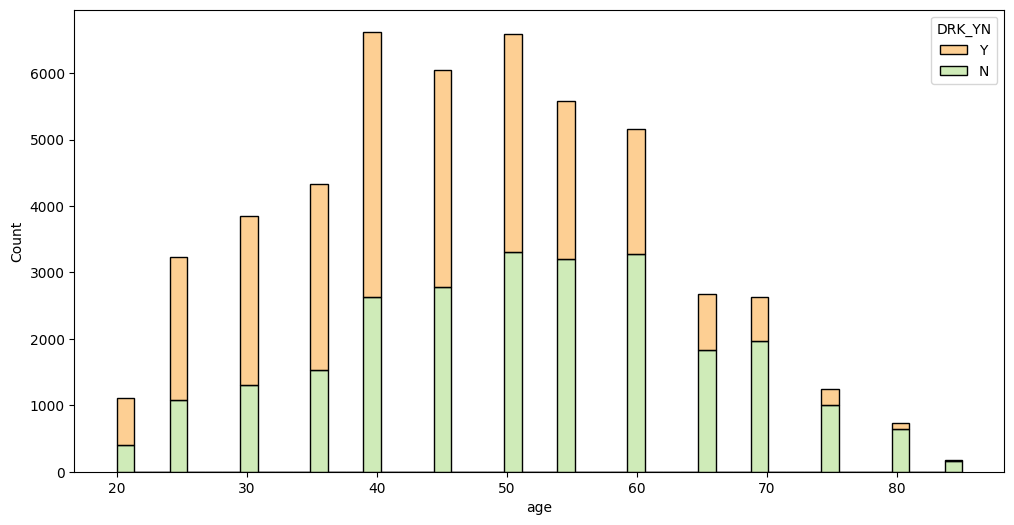

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='age',palette='Spectral',hue='DRK_YN',multiple='stack')

<Axes: xlabel='Age', ylabel='Density'>

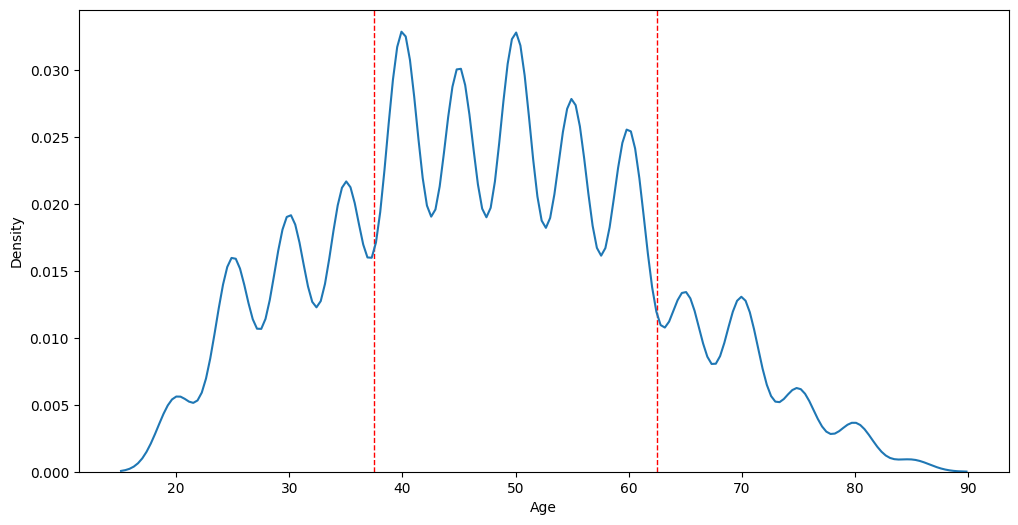

In [11]:
plt.figure(figsize=(12,6))
plt.xlabel("Age")
plt.ylabel("Density")
plt.axvline(x= 37.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)
plt.axvline(x= 62.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)
sns.kdeplot(df.age)

The graph has such an interesting look since the rounding of the age occurred by 5 years [35, 30, 40, 50, 45, 55, 65, 25, 60, 20, 70, 75, 80, 85]. A clear picture is already visible here:
*  People aged 40 to 60 predominate
*  The maximum age is 85 years
*  Minimum age 20 years

График имеет такой интесный вид так как округление возраста происходило по 5 годам [35, 30, 40, 50, 45, 55, 65, 25, 60, 20, 70, 75, 80, 85]. На тут уже видна ясная картина:
* Преобладают люди с возрастом от 40 до 60
* Максимальный восзраст 85 лет
* Минимальный возраст 20 лет
* Среди людей в возрасте от 65 до 85, большая часть не курит по сравнению с другими возрастными группами

## Height (Рост)

<Axes: xlabel='height', ylabel='Count'>

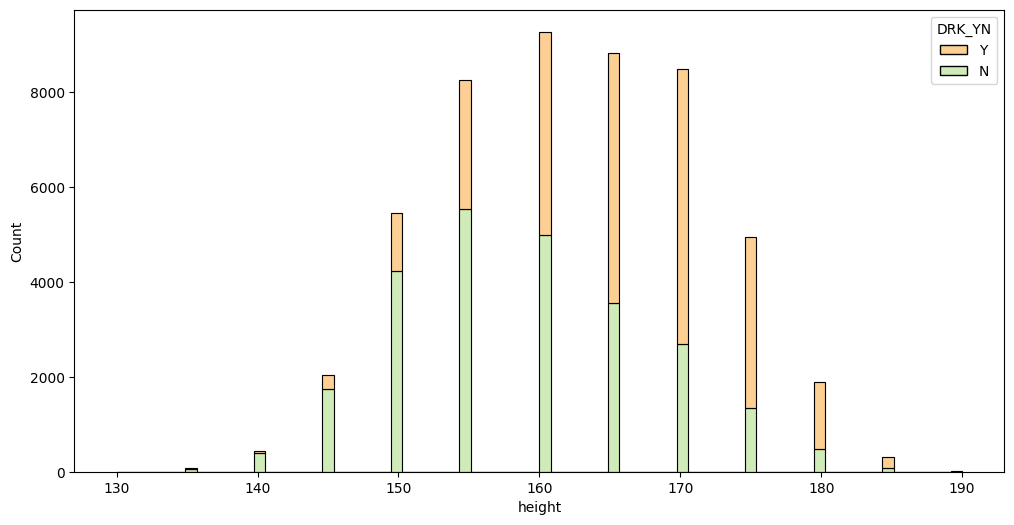

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='height',palette='Spectral',hue='DRK_YN',multiple='stack')

<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
C:\Users\MOHIT\AppData\Local\Temp\ipykernel_8700\1829266634.py:4: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel("Height \ Рост")
C:\Users\MOHIT\AppData\Local\Temp\ipykernel_8700\1829266634.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("Density \ На сколько часто всречается значение")


<Axes: xlabel='Height \\ Рост', ylabel='Density \\ На сколько часто всречается значение'>

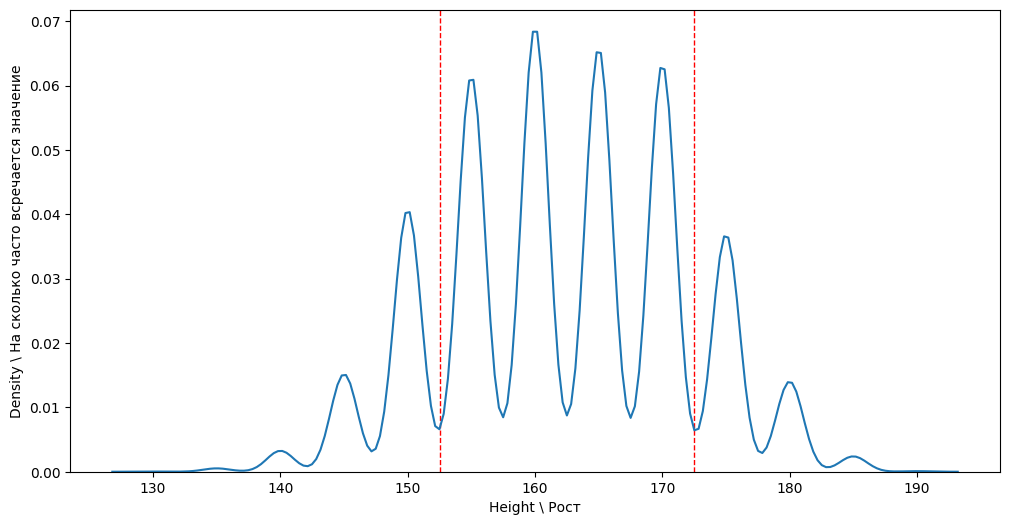

In [13]:
plt.figure(figsize=(12,6))
plt.axvline(x= 152.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)
plt.axvline(x= 172.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)
plt.xlabel("Height \ Рост")
plt.ylabel("Density \ На сколько часто всречается значение")
sns.kdeplot(df.height)

The graph looks like this, so again, as from rounding the growth by 5 cm [170, 180, 165, 175, 150, 155, 160, 145, 140, 185, 135, 190, 130]. Some conclusions can be drawn:
* People with a height of 155 to 170 predominate
* Maximum height 190
* Minimum height 130
* People with a height of 130 are people with an age of 80 years, weighing an average of 36 kg and not the best eyesight

In [14]:
dff=df.drop(columns=['sex','DRK_YN'],axis=1)
dff[dff.height == 130 ].mean()

age                  80.000
height              130.000
weight               35.000
waistline            79.500
sight_left            0.225
sight_right           0.325
hear_left             1.000
hear_right            1.250
SBP                 137.250
DBP                  74.000
BLDS                104.500
tot_chole           185.250
HDL_chole            65.750
LDL_chole           104.250
triglyceride         76.000
hemoglobin           11.825
urine_protein         1.000
serum_creatinine      0.675
SGOT_AST             28.750
SGOT_ALT             18.500
gamma_GTP            22.500
SMK_stat_type_cd      1.000
dtype: float64

## Weight(Вес)

<Axes: xlabel='weight', ylabel='Count'>

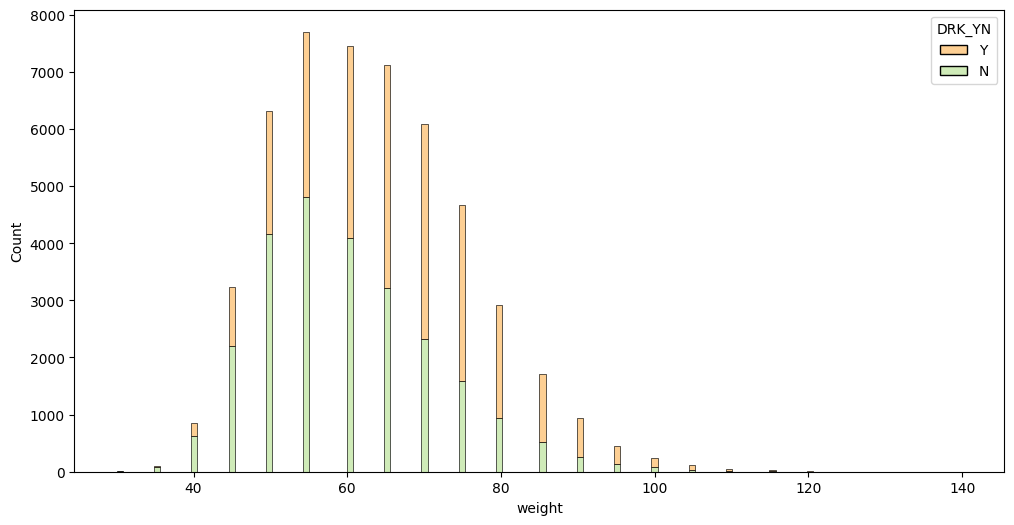

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='weight',palette='Spectral',hue='DRK_YN',multiple='stack')

<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
C:\Users\MOHIT\AppData\Local\Temp\ipykernel_8700\2794740880.py:4: SyntaxWarning: invalid escape sequence '\ '
  plt.xlabel("Weight \ Вес")
C:\Users\MOHIT\AppData\Local\Temp\ipykernel_8700\2794740880.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("Density \ На сколько часто всречается значение")


<Axes: xlabel='Weight \\ Вес', ylabel='Density \\ На сколько часто всречается значение'>

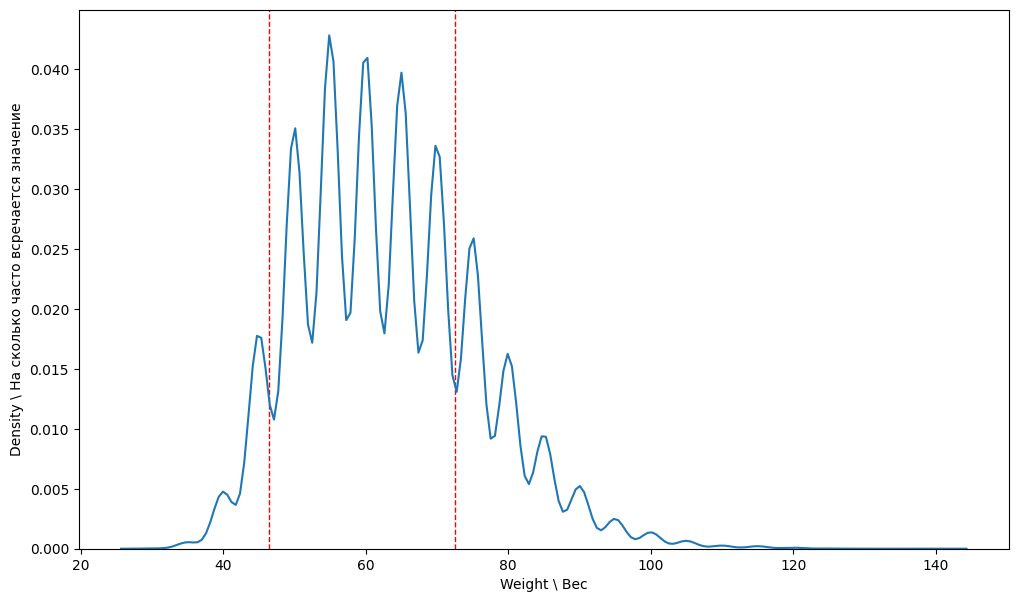

In [16]:
plt.figure(figsize=(12,7))
plt.axvline(x= 46.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)
plt.axvline(x= 72.5, linewidth=1, color='r', linestyle='--', ymin=0, ymax=1)
plt.xlabel("Weight \ Вес")
plt.ylabel("Density \ На сколько часто всречается значение")
sns.kdeplot(df.weight)

The graph looks like this, so again, as from rounding, some conclusions can be drawn:
* People with a weight of 50 to 70 predominate
* Maximum weight 140
* Minimum weight 25
* There is the same pattern between smokers and non-smokers as in the growth column
  
График имеет такой  вид так опятьже как из округление Можно сделать некоторые выводы:
* Преобладают люди с весом от 50 до 70
* Максимальный вес 140
* Минимальный вес 25
* Между курящими и не курящми такая же закономерность что и в столбце рост

C:\Users\MOHIT\AppData\Local\Temp\ipykernel_8700\642821012.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.DRK_YN,palette='Spectral')


<Axes: xlabel='DRK_YN', ylabel='count'>

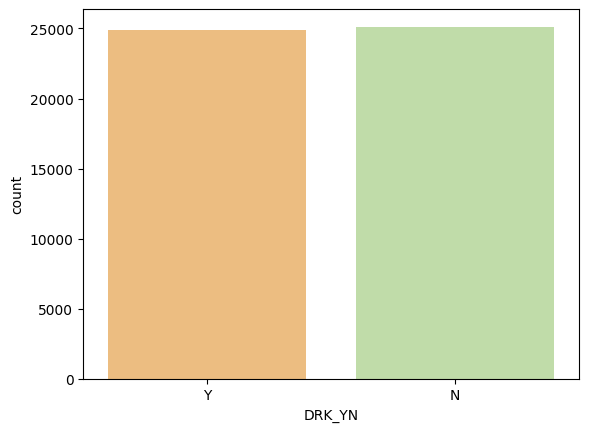

In [17]:
sns.countplot(x=df.DRK_YN,palette='Spectral')

* I have written a function for automatically constructing boxplots for each variable, this will allow us to determine outliers in our data
* Я написал функцию автоматического построения ящиковых диаграмма для каждой переменной, это позволит определить выбросы у нас в данных

In [18]:
def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2  # Определение количества строк в сетке подграфиков

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))

    for i, column in enumerate(num_columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(x=dataframe[column], ax=ax)
        ax.set_title(f"Boxplot of {column}")
        ax.set_xlabel(column)

    plt.tight_layout()
    plt.show()

In [19]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

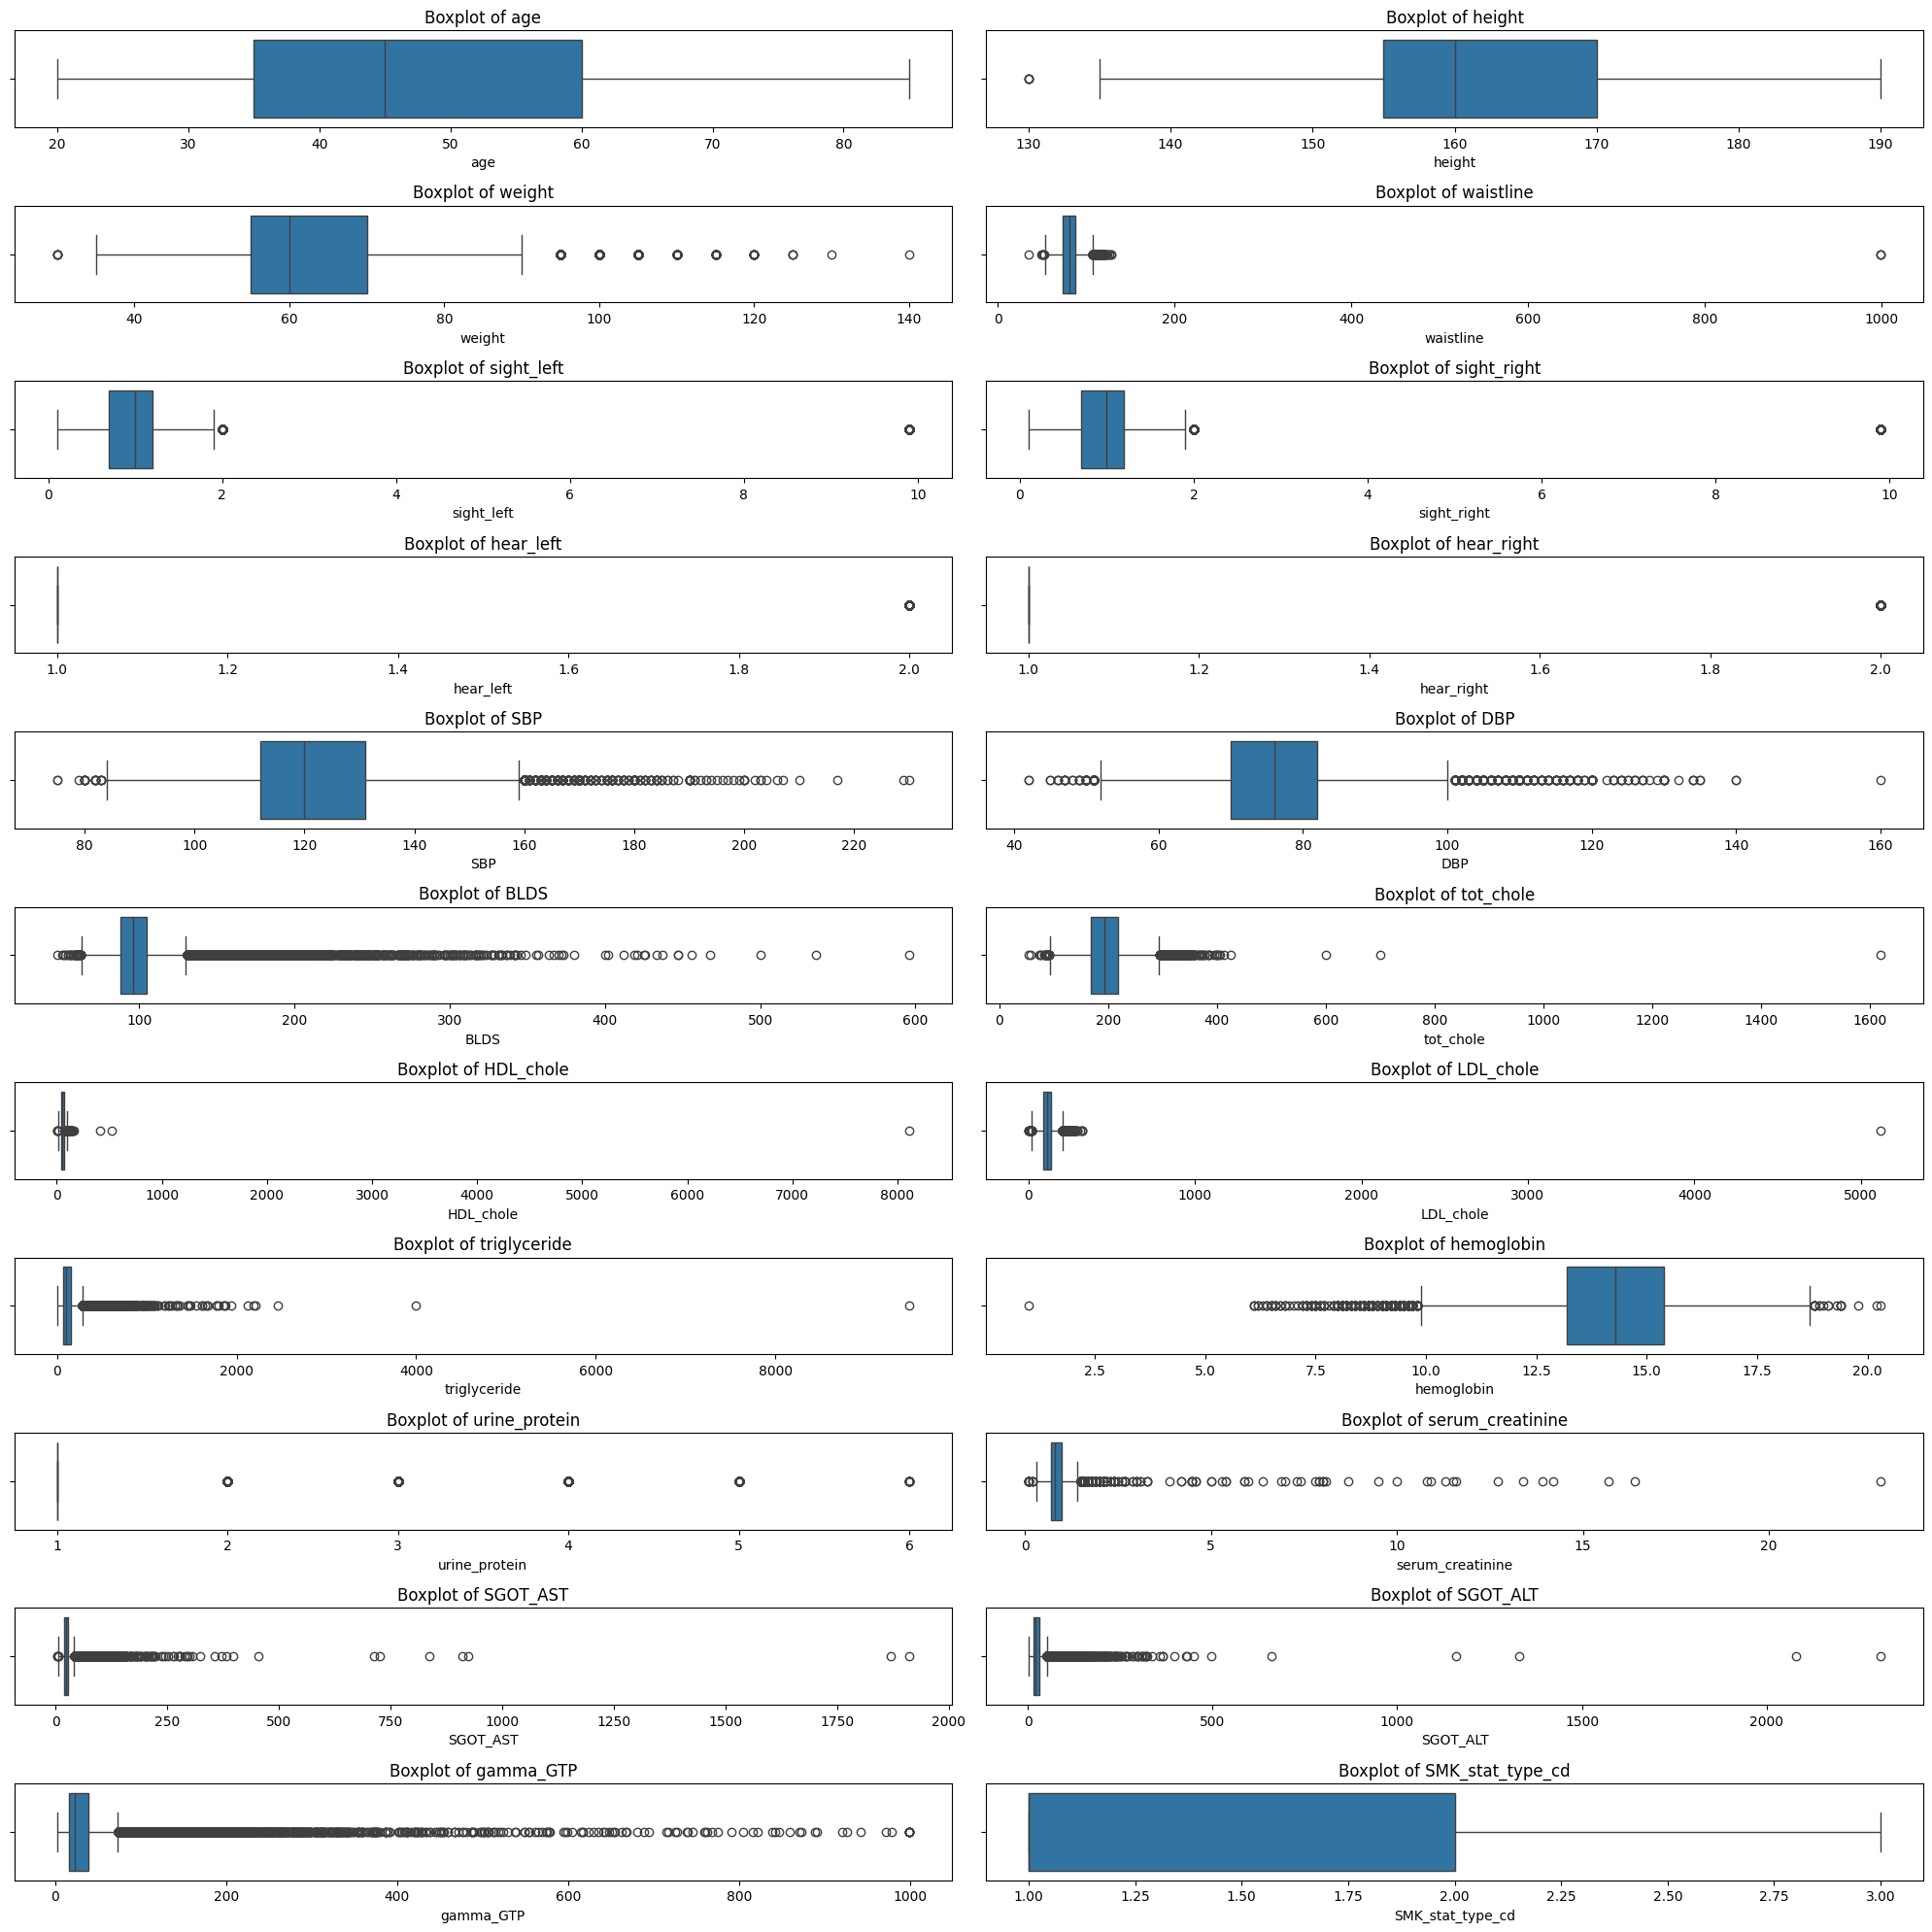

In [20]:
plot_boxplots(df)

* I have written a function that allows you to get rid of outliers in the data.The function uses the interquartile range (IQR) method to determine the outlier boundary and replaces the values in the columns that go beyond these boundaries with the nearest boundary values.
* Я написл функцю, которая позвляет избавться от выбросов в данных.Функция использует метод межквартильного размаха (IQR) для определения границы выбросов и заменяет значения в столбцах, выходящие за эти границы, на ближайшие граничные значения.

In [21]:
def remove_outliers(df, columns, k=1.5):
    """
A function to remove outliers from the specified dataframe columns.

    Parameters:
    df (pandas.DataFrame): the original dataframe
    columns (list): list of columns to remove outliers for
    k (float): coefficient for calculating range boundaries
    """
    for column in columns:
        # Calculate the first and third quartiles
        q1 = df[column].quantile(0.25) # We find the 25 smallest values
        q3 = df[column].quantile(0.75) # We find the 25 largest values

        # Calculate the interquartile range (the difference between the largest and smallest values)
        iqr = q3 - q1

        #Replace values outside the range [q1 * qr, q3 + k * ir] with boundary values
        #clip -used to crop values
        #lower: minimum value for cropping. If the value of the element is less than lower, it is replaced by lower.
        #upper: maximum value for cropping. If the value of the element is greater than upper, it is replaced by upper.
        df[column] = df[column].clip(lower=q1 - k * iqr, upper=q3 + k * iqr)

    return df

In [22]:
# Here I have written columns that have outliers\Сюда я записала столбцы которые имеют выбросы
remove_outliers(df,['waistline','SBP', 'DBP','BLDS','tot_chole','triglyceride','serum_creatinine','SGOT_AST', 'SGOT_ALT'],k=1.5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120.0,...,126,92.0,17.1,1,1.00,21.0,35.0,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130.0,...,148,121.0,15.8,1,0.90,20.0,36.0,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120.0,...,74,104.0,15.8,1,0.90,41.5,32.0,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145.0,...,104,106.0,17.6,1,1.10,29.0,34.0,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138.0,...,117,104.0,13.8,1,0.80,19.0,12.0,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Female,40,155,50,64.0,0.8,0.8,1,1,111.0,...,83,72.0,10.4,1,0.80,19.0,16.0,18,1,N
49995,Female,85,140,50,86.2,0.2,0.2,1,1,127.0,...,143,168.0,9.9,3,1.45,30.0,22.0,20,1,N
49996,Male,25,175,65,74.0,1.2,1.2,1,1,117.0,...,143,60.0,15.9,1,1.10,18.0,16.0,20,3,Y
49997,Male,60,165,65,87.0,0.8,0.8,1,2,114.0,...,119,156.0,15.1,1,0.90,27.0,25.0,22,2,N


# Preparing data for models 

In [23]:
X=df.drop(columns=['DRK_YN'],axis=1)#,'sight_right','sight_left' ,'urine_protein', 'hear_left', 'hear_right','SBP','tot_chole'
y = df.DRK_YN

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Catboost

In [25]:
import catboost as cb
import numpy as np
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report

In [26]:
categorical_features_indices = np.where(X.dtypes == object)[0]
train_pool=Pool(X_train,y_train,cat_features=categorical_features_indices)
test_pool=Pool(X_test,y_test,cat_features=categorical_features_indices)
model=CatBoostClassifier(custom_loss=[metrics.Accuracy()],# loss
                         random_seed=42,
                         logging_level='Silent',
                         task_type='GPU')

In [27]:
%%time
model.fit(train_pool,
          eval_set=test_pool,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: total: 41 s
Wall time: 38.4 s


## Model Metrics

In [28]:
print(classification_report(model.predict(X_test),y_test))

              precision    recall  f1-score   support

           N       0.73      0.73      0.73      7492
           Y       0.73      0.73      0.73      7508

    accuracy                           0.73     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.73      0.73      0.73     15000



In [29]:
# Feature importance 
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,19.585267
1,gamma_GTP,16.609752
2,sex,11.223763
3,HDL_chole,10.554243
4,SGOT_ALT,8.135752
5,SMK_stat_type_cd,7.129854
6,SGOT_AST,3.397279
7,triglyceride,2.724599
8,LDL_chole,2.596628
9,waistline,2.496435


* Having the importance of the variables, some conclusions can be drawn:
Age, gamma_GTP(Gamma-glutamyltransferase),Gender,HDL_chole(HDL cholesterol level),SMK_stat_type_cd("Smoking stage") and SGOT_ALT(alanin*e transaminase) together can be strong biomarkers for detecting whether a person drinks or not.
gamma_GPT is especially important. Since this enzyme is involved in the exchange of amino acids. Catalyzes the transfer of a gamma-glutamyl residue from a gamma-glutamyl peptide to an amino acid, another peptide, or, during hydrolysis, to water. It accumulates mainly in the KIDNEYS, LIVER and PANCREAS. In cells, it is localized in the membrane, lysosomes and cytoplasm. Just his importance was noticed by the mod..
